**Import necessary libraries**

In [ ]:
import cv2
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Load the MNIST dataset**

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target
print("Dataset loaded.")

Dataset loaded.


**Split data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into train and test sets.")

Data split into train and test sets.


**# Apply PCA for dimensionality reduction**

In [ ]:
X_train.shape

(56000, 784)

In [ ]:
n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"PCA applied. Reduced to {n_components} components.")

PCA applied. Reduced to 50 components.


In [ ]:
X_train_pca.shape

(56000, 50)

# **Train a Decision Tree classifier with actual data**

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print("Decision Tree model trained.")

Decision Tree model trained.


**Make Predictions, Evaluate the model, classification report**

In [ ]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8695
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.87      0.83      0.85      1380
           3       0.83      0.84      0.83      1433
           4       0.84      0.87      0.85      1295
           5       0.83      0.82      0.82      1273
           6       0.90      0.90      0.90      1396
           7       0.91      0.90      0.91      1503
           8       0.80      0.80      0.80      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



**Confusion matrix visualization**

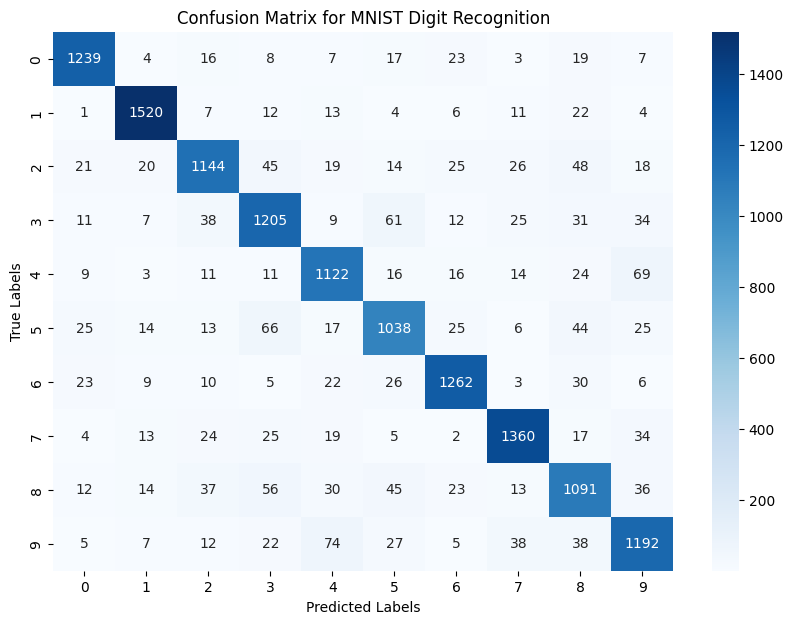

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for MNIST Digit Recognition")
plt.show()

# **Train a Decision Tree classifier on the reduced data**

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_pca, y_train)
print("Decision Tree model trained.")

Decision Tree model trained.


In [ ]:
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8452
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1343
           1       0.95      0.96      0.95      1600
           2       0.83      0.82      0.83      1380
           3       0.80      0.82      0.81      1433
           4       0.81      0.80      0.81      1295
           5       0.80      0.79      0.80      1273
           6       0.89      0.89      0.89      1396
           7       0.87      0.87      0.87      1503
           8       0.80      0.76      0.78      1357
           9       0.78      0.80      0.79      1420

    accuracy                           0.85     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.85      0.84     14000



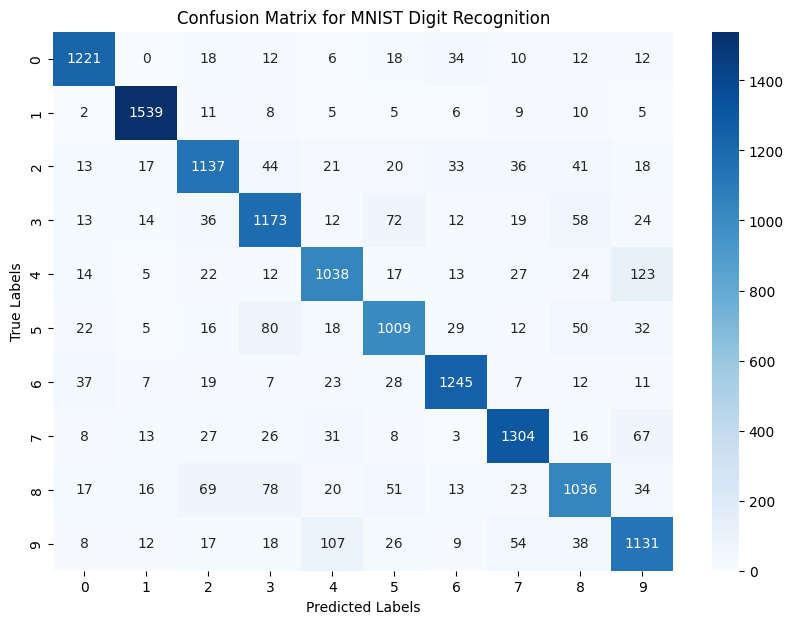

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for MNIST Digit Recognition")
plt.show()

# **Predict**

In [ ]:
image= "/content/for test.jpg"

In [ ]:
def preprocess_image(image_path):
    # Load the image as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize to 28x28 pixels (same as MNIST images)
    img_resized = cv2.resize(img, (28, 28))
    # Flatten the image into a 1D array
    img_flattened = img_resized.flatten()
    # Normalize pixel values to match MNIST (0 to 255 -> 0 to 1)
    img_normalized = img_flattened / 255.0
    return img_normalized

In [ ]:
test_image = preprocess_image(image).reshape(1, -1)

In [ ]:
test_image_pca = pca.transform(test_image)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
predicted_class = clf.predict(test_image_pca)
print("Predicted class:", predicted_class[0])

Predicted class: 4
